# TASK A

In [1]:
import numpy as np
import assignment_pso as assign2
import matplotlib.pyplot as plt

In [2]:
class Particle:
    # Initialization
    def __init__(self, x_min, x_max, v_max, particle_id, objective_function, c1, c2, w):
        self.id = particle_id
        self.objective_function = objective_function
        self.x_min = x_min
        self.x_max = x_max
        self.c1 = c1
        self.c2 = c2
        self.v_max = v_max
        # initial position attribute
        self.x = np.random.uniform(self.x_min, self.x_max) 
        # initial function value attribute
        self.fx = self.objective_function(self.x) 
        # initial v_t+1
        self.v_next = 0.01*np.random.uniform(-self.v_max, self.v_max) 
        # Here we set the velocity inertia, w, as 1.
        self.w = w
        # initial personal best position x
        self.p_best_x = self.x
        # initial the personal function value with the initial best position
        self.p_best_fx = self.fx
         
        # Create two empty lists to store the trajectory, say 𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑦_𝑥 and 𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑦_𝑓𝑥.
        self.trajectory_x =[]
        self.trajectory_fx =[]
            
        # Add the initial x and f(x) values into the trajectories.
        self.trajectory_x.append(self.x)
        self.trajectory_fx.append(self.fx)
    
    def step(self, g_best_x):
        # Updates v_next
        r1 = np.random.uniform(size = 1)
        r2 = np.random.uniform(size = 1)
            
        # v_t+1 = w*v_t + c1*r1(t)*(x_pb - x_t) + c2*r2(t)*(x_gb - x_t)
        
        self.v_next = self.w * self.v_next + self.c1*r1*(self.p_best_x - self.x) + self.c2*r2*(g_best_x - self.x)

        # Cap v_next if it gets to big
        if np.abs(self.v_next) > self.v_max:
            self.v_next = self.v_max * np.sign(self.v_next)
        
        # Updates x
        self.x = self.x +  self.v_next

        # If the updated position is out of the search area, 
        # keep the particle at its research boarder, then change its direction of velocity.
        if self.x >= self.x_max:
            self.x = self.x_max 
            self.v_next = -self.v_next
        if self.x <= self.x_min:
            self.x = self.x_min
            self.v_next = -self.v_next
            
        # Add x values into the trajectroies
        self.trajectory_x.append(self.x)
        
        # Evaluates f(x)
        self.fx = self.objective_function(self.x)
        # Adds f(x) values into the trajectroies
        self.trajectory_fx.append(self.fx)
        
        # Updates personal best x
        # If the new x position triggers a better value of f(x), it would be the current personal best x.
        if self.p_best_fx > self.fx:
            self.p_best_x = self.x
            self.p_best_fx = self.fx
            
    def get_particle_info_array(self):
        # Return array with
        # [x, f(x), v_next, x_personal_best, f(x_personal_best)]
        return [self.x, self.fx, self.v_next, self.p_best_x, self.p_best_fx]       

In [3]:
class PSO:
    def __init__(self, objective_function, x_min, x_max, v_max, c1, c2, N_particles, w):
        self.objective_function = objective_function
        self.nr_particles = N_particles
        self.x_min = x_min
        self.x_max = x_max
        self.v_max = v_max
        self.c1 = c1
        self.c2 = c2
        self.w = w
        # internal step counter
        self.step_i = 0 
        # init empty list
        self.swarm = []
        for i in range(self.nr_particles):
            p = Particle(self.x_min, self.x_max, self.v_max, i, self.objective_function, c1, c2, w)
            self.swarm.append(p)
        
        # Initial global best x and its function value.
        # It comes from the best particle.
        self.global_best_x, self.global_best_fx = self.get_current_best_x_and_fx()
        print(self.global_best_x, self.global_best_fx)

    def get_current_best_x_and_fx(self):
        # Returns the global best position x_best of the swarm 
        # and the value of the objective function value at position x_best
        first_particle = self.swarm[0]
        current_best_x = first_particle.x
        current_best_fx = first_particle.fx
        for p in self.swarm:
            if current_best_fx > p.fx:
                current_best_x = p.x
                current_best_fx = p.fx

        return current_best_x, current_best_fx

    def step(self):
        for p in self.swarm:
            p.step(self.global_best_x)
        
        # get and set current best and logic it
        current_best_x, current_best_fx = self.get_current_best_x_and_fx()
        
        if current_best_fx < self.global_best_fx:
            print(f"New Global Best has been achieved")
            print(f"- x: {current_best_x} f(x): {current_best_fx}")
            self.global_best_x = current_best_x
            self.global_best_fx = current_best_fx
          
        # Adds 1 to step counter 
        self.step_i += 1 

    def visualize_swarm(self, figsize = [10,10]):
        x = np.linspace(self.x_min, self.x_max, 1000)
        y = self.objective_function(x)
        plt.figure(figsize = figsize)
        
        title_string = 'step:'  + str(self.step_i)
        plt.title(title_string)
        plt.xlabel("x")
        plt.ylabel("y = f(x)")
        plt.plot(x, y) #plotting objective function within search region
        plt.xlim(x_min, x_max)

        for particle in self.swarm:
            plt.scatter(particle.x, particle.fx)
            plt.text(particle.x, particle.fx + 0.1, str(particle.id))
    
        plt.plot(self.global_best_x, self.global_best_fx, marker = 'X', markersize = 20)
        
    def plot_swarm_trajectory_graph(self, fig_width = 15, fig_height = 15):
        plt.figure(figsize = (fig_width,fig_height))
        plt.title("Particle trajectory")
        plt.xlabel("nr iterations") 
        plt.ylabel("particle x position")
        for particle in self.swarm:
            plt.plot(range(len(particle.trajectory_x)), particle.trajectory_x, 3)
            
    def run(self, nr_steps):
        for i in range(nr_steps):
            self.step()
        return self.global_best_x, self.global_best_fx

# TASK B
## Some experiments about questions in TASK B

## 2.
Assume a PSO is initialized to minimize one of the randomly generated functions in the search space $S_x = [-500, 500]$ and with all the parameters $w$, $c_1$, $c_2$, vmax set to equal 1.
<br>
Investigate (with support from swarm trajectory graphs and/or mathematical argumentation),
what happens to the swarm behaviour when you set one of the above parameters to zero
while keeping the others equal to one? Do this for all four parameters, one at a time. 
<br>
Also investigate what happens to the swarm behaviour when you set one of the above parameters
to to a relatively large value? Are the observed changes in behaviour expected/surprising?

### The original.

In [4]:
#### Use case code snippet of your 1D PSO class implementation ######
# Specify x-axis search space interval
x_min = -500
x_max = 500
v_max = 1
c1 = 1
c2 = 1
N_particles = 10
w = 1

# Generate a random function
obj_f = assign2.generate_an_objective_function(x_min, x_max)

# Instantiate your PSO class
my_pso = PSO(objective_function = obj_f, x_min = x_min, x_max = x_max, v_max = v_max, c1 = c1, c2 = c2, 
             N_particles = N_particles, w = w)

1000
100.46812955848998 -3.046573037818299


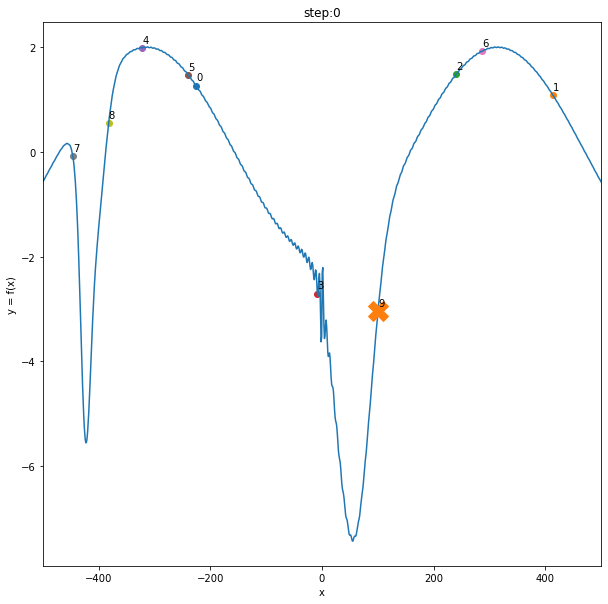

In [5]:
my_pso.visualize_swarm()

In [6]:
my_pso.run(2000)

New Global Best has been achieved
- x: [100.46725565] f(x): [-3.04668934]
New Global Best has been achieved
- x: [100.4655128] f(x): [-3.04692127]
New Global Best has been achieved
- x: [-2.28980843] f(x): [-3.24700545]
New Global Best has been achieved
- x: [-1.28980843] f(x): [-3.68314747]
New Global Best has been achieved
- x: [94.46376995] f(x): [-3.76066245]
New Global Best has been achieved
- x: [93.46376995] f(x): [-3.90641145]
New Global Best has been achieved
- x: [92.46376995] f(x): [-4.04007529]
New Global Best has been achieved
- x: [91.46376995] f(x): [-4.15562719]
New Global Best has been achieved
- x: [90.46376995] f(x): [-4.26483796]
New Global Best has been achieved
- x: [89.46376995] f(x): [-4.38653704]
New Global Best has been achieved
- x: [-428.56401535] f(x): [-4.5975897]
New Global Best has been achieved
- x: [-427.56401535] f(x): [-4.88088944]
New Global Best has been achieved
- x: [-426.56401535] f(x): [-5.11990383]
New Global Best has been achieved
- x: [-425.

(array([55.0226093]), array([-7.44087673]))

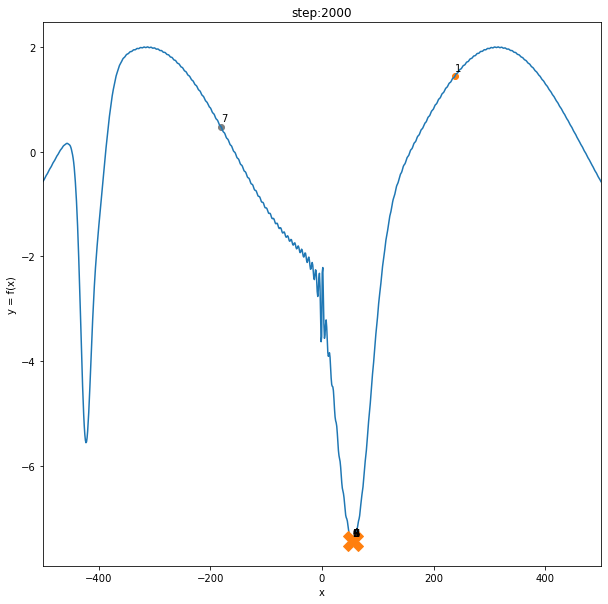

In [7]:
my_pso.visualize_swarm()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


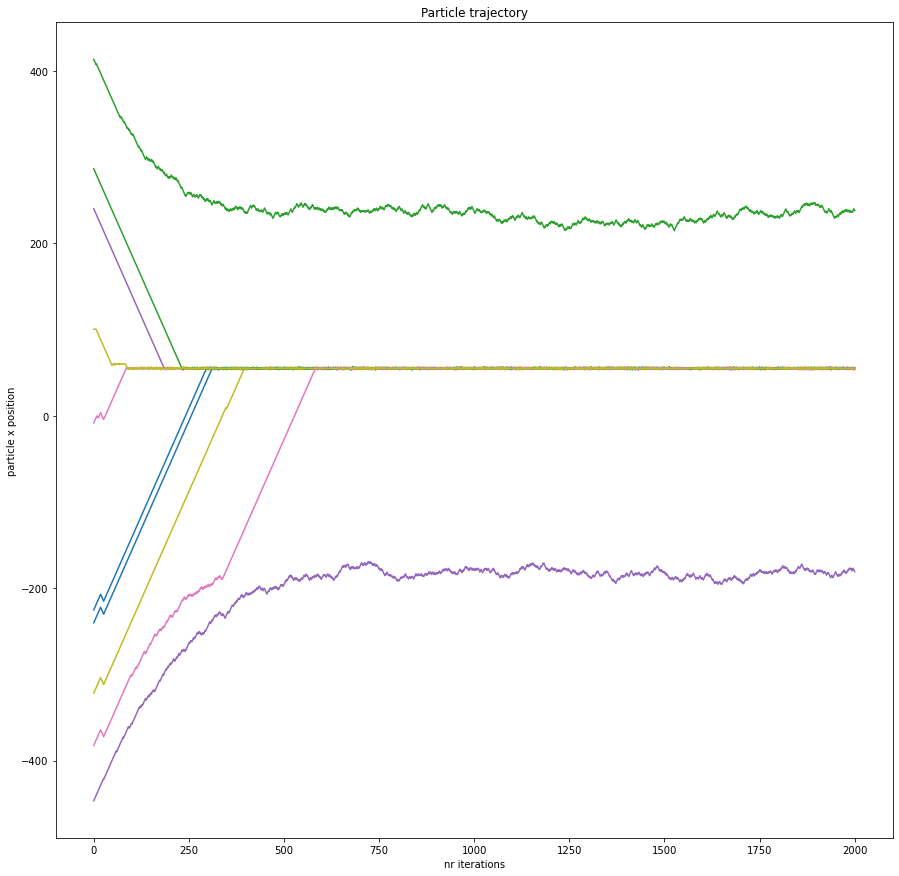

In [8]:
my_pso.plot_swarm_trajectory_graph()

### If we set $v_{max} = 0$

In [9]:
x_min = -500
x_max = 500
v_max = 0
c1 = 1
c2 = 1
N_particles = 10
w = 1
my_pso = PSO(objective_function = obj_f, x_min = x_min, x_max = x_max, v_max = v_max, c1 = c1, c2 = c2, 
             N_particles = N_particles, w = w)

79.56705298664633 -5.710165535998252


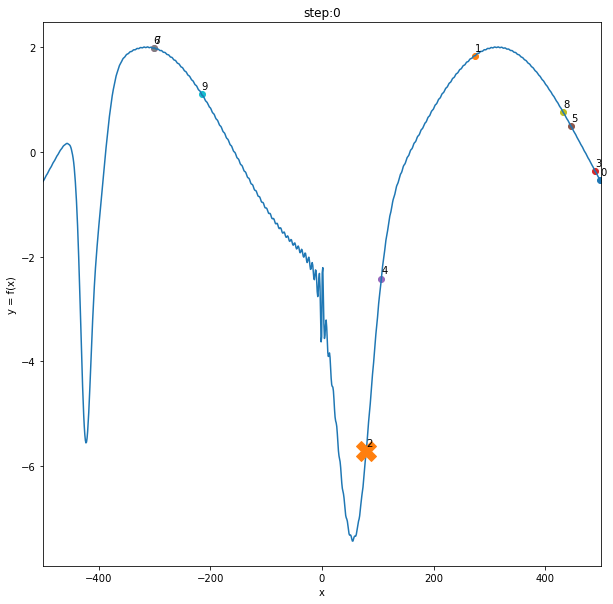

In [10]:
my_pso.visualize_swarm()

In [11]:
my_pso.run(2000)

(79.56705298664633, -5.710165535998252)

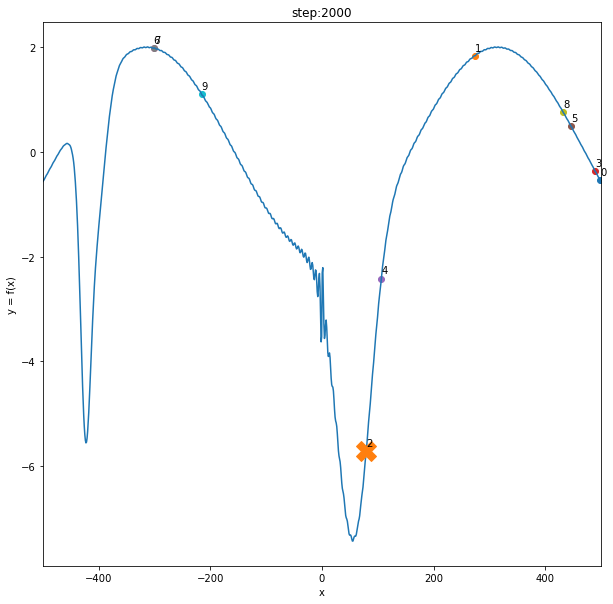

In [12]:
my_pso.visualize_swarm()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


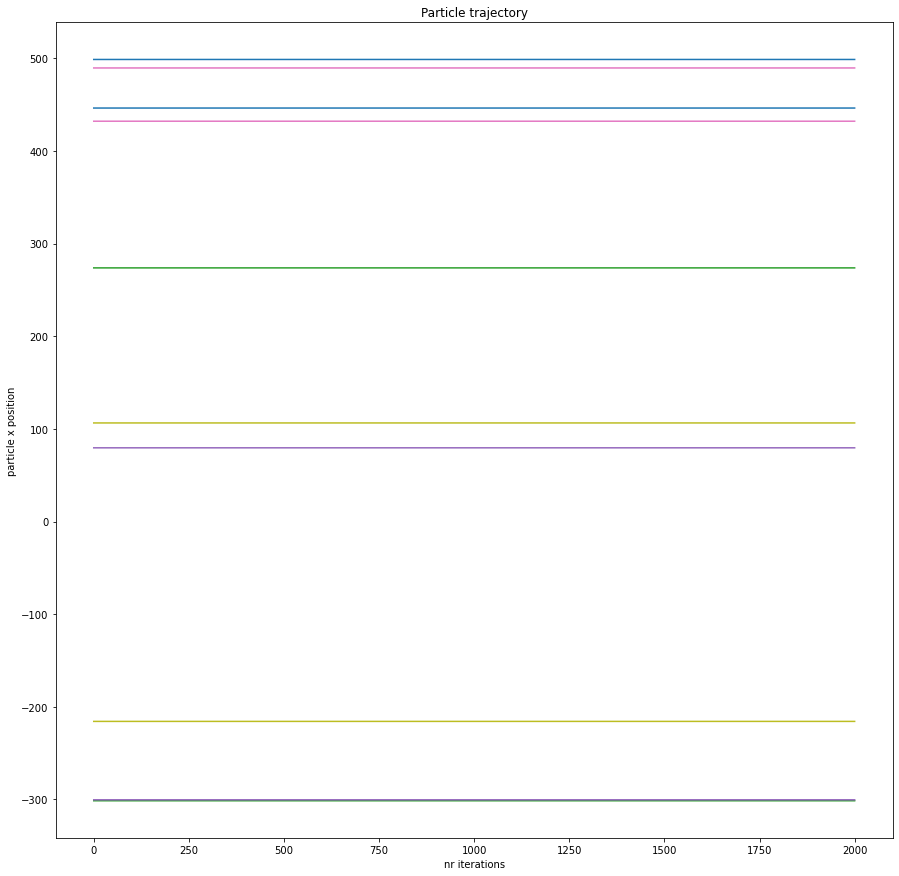

In [13]:
my_pso.plot_swarm_trajectory_graph()

### If we set $c_1 = 0$

In [14]:
x_min = -500
x_max = 500
v_max = 1
c1 = 0
c2 = 1
N_particles = 10
w = 1
my_pso = PSO(objective_function = obj_f, x_min = x_min, x_max = x_max, v_max = v_max, c1 = c1, c2 = c2, 
             N_particles = N_particles, w = w)

43.34779264961173 -6.985816179297442


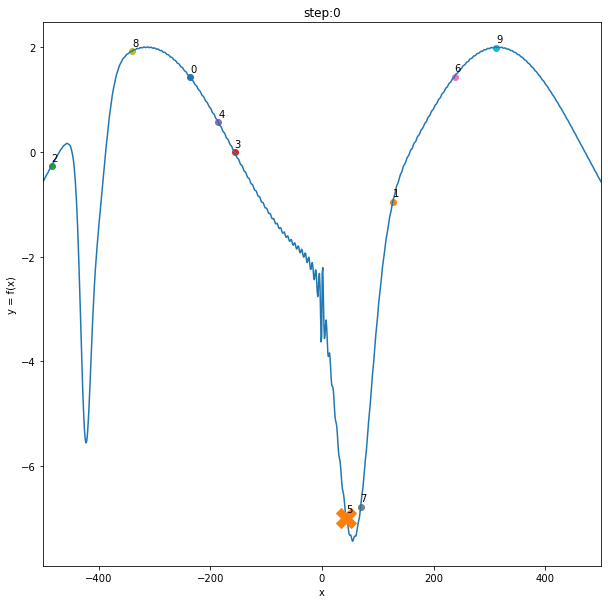

In [15]:
my_pso.visualize_swarm()

In [16]:
my_pso.run(2000)

New Global Best has been achieved
- x: [66.30601203] f(x): [-7.02711944]
New Global Best has been achieved
- x: [65.30601203] f(x): [-7.06518012]
New Global Best has been achieved
- x: [64.30601203] f(x): [-7.11393751]
New Global Best has been achieved
- x: [63.30601203] f(x): [-7.18476485]
New Global Best has been achieved
- x: [62.30601203] f(x): [-7.26320249]
New Global Best has been achieved
- x: [61.30601203] f(x): [-7.32150214]
New Global Best has been achieved
- x: [60.30601203] f(x): [-7.3439746]
New Global Best has been achieved
- x: [58.23627681] f(x): [-7.34484372]
New Global Best has been achieved
- x: [53.33694666] f(x): [-7.38959751]
New Global Best has been achieved
- x: [54.33694666] f(x): [-7.43111402]
New Global Best has been achieved
- x: [55.33694666] f(x): [-7.43882579]
New Global Best has been achieved
- x: [54.73559348] f(x): [-7.43913833]
New Global Best has been achieved
- x: [54.80820819] f(x): [-7.43990631]
New Global Best has been achieved
- x: [55.04075612]

(array([55.02254841]), array([-7.44087673]))

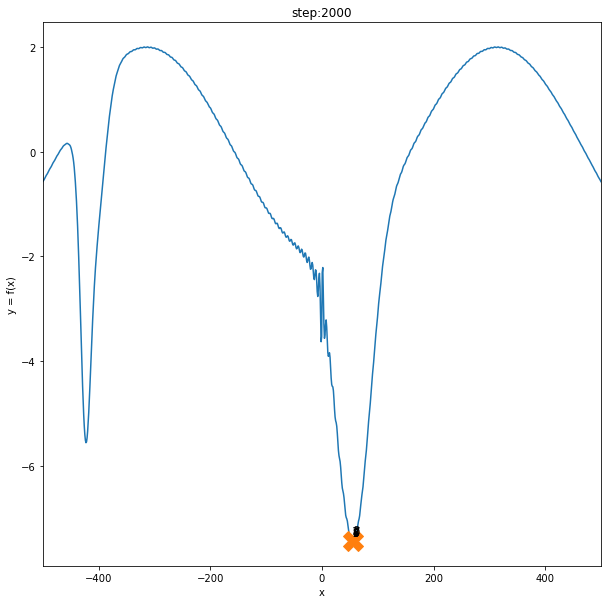

In [17]:
my_pso.visualize_swarm()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


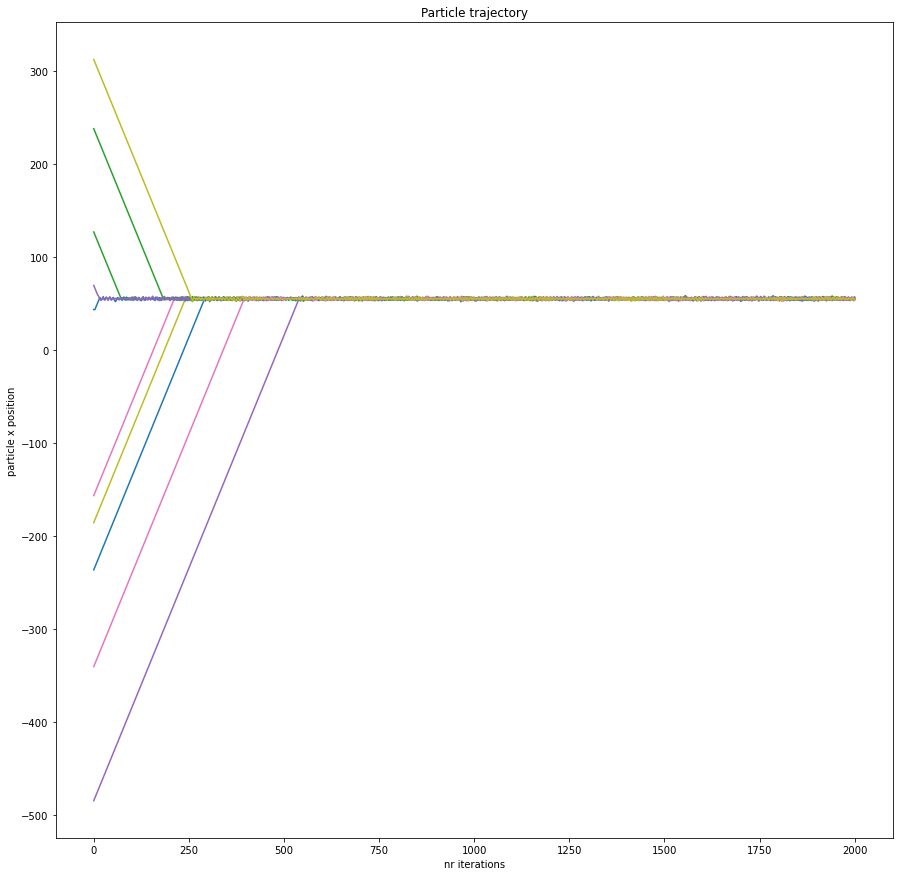

In [18]:
my_pso.plot_swarm_trajectory_graph()

### If we set $c_2 = 0$

In [19]:
x_min = -500
x_max = 500
v_max = 1
c1 = 1
c2 = 0
N_particles = 10
w = 1
my_pso = PSO(objective_function = obj_f, x_min = x_min, x_max = x_max, v_max = v_max, c1 = c1, c2 = c2, 
             N_particles = N_particles, w = w)

-420.7633039027943 -5.451402149094325


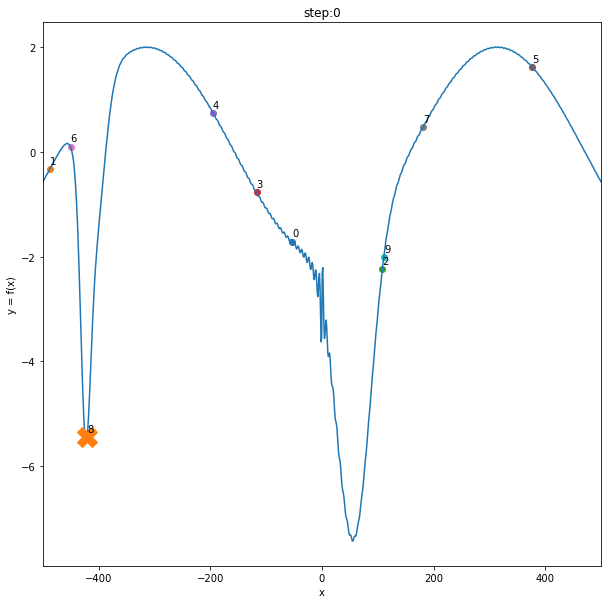

In [20]:
my_pso.visualize_swarm()

In [21]:
my_pso.run(2000)

New Global Best has been achieved
- x: [-420.76492953] f(x): [-5.45158106]
New Global Best has been achieved
- x: [-420.76655515] f(x): [-5.45175984]
New Global Best has been achieved
- x: [-420.76818077] f(x): [-5.45193849]
New Global Best has been achieved
- x: [-420.7698064] f(x): [-5.45211701]
New Global Best has been achieved
- x: [-420.77143202] f(x): [-5.45229541]
New Global Best has been achieved
- x: [-420.77305765] f(x): [-5.45247367]
New Global Best has been achieved
- x: [-420.77468327] f(x): [-5.45265181]
New Global Best has been achieved
- x: [-420.7763089] f(x): [-5.45282981]
New Global Best has been achieved
- x: [-420.77793452] f(x): [-5.45300769]
New Global Best has been achieved
- x: [-420.77956014] f(x): [-5.45318544]
New Global Best has been achieved
- x: [-420.78118577] f(x): [-5.45336305]
New Global Best has been achieved
- x: [-420.78281139] f(x): [-5.45354054]
New Global Best has been achieved
- x: [-420.78443702] f(x): [-5.4537179]
New Global Best has been ach

New Global Best has been achieved
- x: [-421.21685302] f(x): [-5.49615329]
New Global Best has been achieved
- x: [-421.21847864] f(x): [-5.49629447]
New Global Best has been achieved
- x: [-421.22010426] f(x): [-5.4964355]
New Global Best has been achieved
- x: [-421.22172989] f(x): [-5.4965764]
New Global Best has been achieved
- x: [-421.22335551] f(x): [-5.49671715]
New Global Best has been achieved
- x: [-421.22498114] f(x): [-5.49685776]
New Global Best has been achieved
- x: [-421.22660676] f(x): [-5.49699822]
New Global Best has been achieved
- x: [-421.22823238] f(x): [-5.49713855]
New Global Best has been achieved
- x: [-421.22985801] f(x): [-5.49727873]
New Global Best has been achieved
- x: [-421.23148363] f(x): [-5.49741878]
New Global Best has been achieved
- x: [-421.23310926] f(x): [-5.49755868]
New Global Best has been achieved
- x: [-421.23473488] f(x): [-5.49769844]
New Global Best has been achieved
- x: [-421.2363605] f(x): [-5.49783805]
New Global Best has been ach

New Global Best has been achieved
- x: [-421.6687765] f(x): [-5.5298124]
New Global Best has been achieved
- x: [-421.67040213] f(x): [-5.52991273]
New Global Best has been achieved
- x: [-421.67202775] f(x): [-5.53001291]
New Global Best has been achieved
- x: [-421.67365338] f(x): [-5.53011294]
New Global Best has been achieved
- x: [-421.675279] f(x): [-5.53021281]
New Global Best has been achieved
- x: [-421.67690462] f(x): [-5.53031253]
New Global Best has been achieved
- x: [-421.67853025] f(x): [-5.5304121]
New Global Best has been achieved
- x: [-421.68015587] f(x): [-5.53051152]
New Global Best has been achieved
- x: [-421.6817815] f(x): [-5.53061079]
New Global Best has been achieved
- x: [-421.68340712] f(x): [-5.5307099]
New Global Best has been achieved
- x: [-421.68503274] f(x): [-5.53080886]
New Global Best has been achieved
- x: [-421.68665837] f(x): [-5.53090767]
New Global Best has been achieved
- x: [-421.68828399] f(x): [-5.53100632]
New Global Best has been achieve

New Global Best has been achieved
- x: [-422.10281813] f(x): [-5.55109764]
New Global Best has been achieved
- x: [-422.10444375] f(x): [-5.55115625]
New Global Best has been achieved
- x: [-422.10606938] f(x): [-5.55121469]
New Global Best has been achieved
- x: [-422.107695] f(x): [-5.55127298]
New Global Best has been achieved
- x: [-422.10932062] f(x): [-5.5513311]
New Global Best has been achieved
- x: [-422.11094625] f(x): [-5.55138906]
New Global Best has been achieved
- x: [-422.11257187] f(x): [-5.55144687]
New Global Best has been achieved
- x: [-422.1141975] f(x): [-5.55150451]
New Global Best has been achieved
- x: [-422.11582312] f(x): [-5.55156199]
New Global Best has been achieved
- x: [-422.11744874] f(x): [-5.55161932]
New Global Best has been achieved
- x: [-422.11907437] f(x): [-5.55167648]
New Global Best has been achieved
- x: [-422.12069999] f(x): [-5.55173348]
New Global Best has been achieved
- x: [-422.12232562] f(x): [-5.55179033]
New Global Best has been achi

New Global Best has been achieved
- x: [-422.53848538] f(x): [-5.56101412]
New Global Best has been achieved
- x: [-422.540111] f(x): [-5.56102914]
New Global Best has been achieved
- x: [-422.54173662] f(x): [-5.561044]
New Global Best has been achieved
- x: [-422.54336225] f(x): [-5.5610587]
New Global Best has been achieved
- x: [-422.54498787] f(x): [-5.56107323]
New Global Best has been achieved
- x: [-422.5466135] f(x): [-5.5610876]
New Global Best has been achieved
- x: [-422.54823912] f(x): [-5.5611018]
New Global Best has been achieved
- x: [-422.54986474] f(x): [-5.56111584]
New Global Best has been achieved
- x: [-422.55149037] f(x): [-5.56112971]
New Global Best has been achieved
- x: [-422.55311599] f(x): [-5.56114342]
New Global Best has been achieved
- x: [-422.55474162] f(x): [-5.56115696]
New Global Best has been achieved
- x: [-422.55636724] f(x): [-5.56117034]
New Global Best has been achieved
- x: [-422.55799286] f(x): [-5.56118355]
New Global Best has been achieved

New Global Best has been achieved
- x: [77.03066627] f(x): [-5.96802752]
New Global Best has been achieved
- x: [77.00569103] f(x): [-5.97090146]
New Global Best has been achieved
- x: [76.98071579] f(x): [-5.97378952]
New Global Best has been achieved
- x: [76.95574056] f(x): [-5.97669171]
New Global Best has been achieved
- x: [76.93076532] f(x): [-5.97960805]
New Global Best has been achieved
- x: [76.90579008] f(x): [-5.98253853]
New Global Best has been achieved
- x: [76.88081484] f(x): [-5.98548314]
New Global Best has been achieved
- x: [76.8558396] f(x): [-5.98844186]
New Global Best has been achieved
- x: [76.83086436] f(x): [-5.99141467]
New Global Best has been achieved
- x: [76.80588912] f(x): [-5.99440152]
New Global Best has been achieved
- x: [76.78091388] f(x): [-5.99740237]
New Global Best has been achieved
- x: [76.75593864] f(x): [-6.00041716]
New Global Best has been achieved
- x: [76.7309634] f(x): [-6.00344581]
New Global Best has been achieved
- x: [76.70598816] 

New Global Best has been achieved
- x: [70.93670777] f(x): [-6.61200586]
New Global Best has been achieved
- x: [70.91173253] f(x): [-6.61416286]
New Global Best has been achieved
- x: [70.88675729] f(x): [-6.61633374]
New Global Best has been achieved
- x: [70.86178205] f(x): [-6.61851861]
New Global Best has been achieved
- x: [70.83680681] f(x): [-6.62071756]
New Global Best has been achieved
- x: [70.81183157] f(x): [-6.62293069]
New Global Best has been achieved
- x: [70.78685633] f(x): [-6.62515805]
New Global Best has been achieved
- x: [70.76188109] f(x): [-6.62739972]
New Global Best has been achieved
- x: [70.73690585] f(x): [-6.62965575]
New Global Best has been achieved
- x: [70.71193061] f(x): [-6.63192617]
New Global Best has been achieved
- x: [70.68695537] f(x): [-6.63421103]
New Global Best has been achieved
- x: [70.66198013] f(x): [-6.63651034]
New Global Best has been achieved
- x: [70.63700489] f(x): [-6.63882411]
New Global Best has been achieved
- x: [70.61202965

New Global Best has been achieved
- x: [64.49309591] f(x): [-7.10312882]
New Global Best has been achieved
- x: [64.46812067] f(x): [-7.10452216]
New Global Best has been achieved
- x: [64.44314543] f(x): [-7.10593072]
New Global Best has been achieved
- x: [64.41817019] f(x): [-7.10735456]
New Global Best has been achieved
- x: [64.39319495] f(x): [-7.10879369]
New Global Best has been achieved
- x: [64.36821971] f(x): [-7.11024815]
New Global Best has been achieved
- x: [64.34324447] f(x): [-7.11171793]
New Global Best has been achieved
- x: [64.31826923] f(x): [-7.11320305]
New Global Best has been achieved
- x: [64.29329399] f(x): [-7.11470348]
New Global Best has been achieved
- x: [64.26831875] f(x): [-7.1162192]
New Global Best has been achieved
- x: [64.24334351] f(x): [-7.11775016]
New Global Best has been achieved
- x: [64.21836827] f(x): [-7.11929632]
New Global Best has been achieved
- x: [64.19339303] f(x): [-7.12085762]
New Global Best has been achieved
- x: [64.16841779]

(array([61.19636426]), array([-7.32575174]))

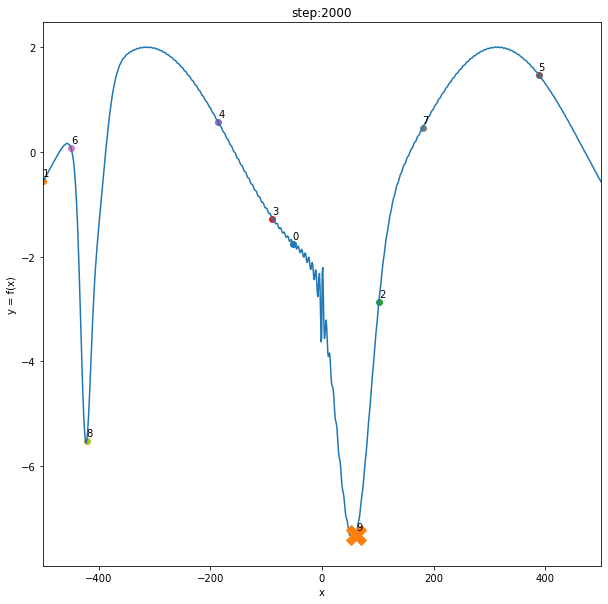

In [22]:
my_pso.visualize_swarm()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


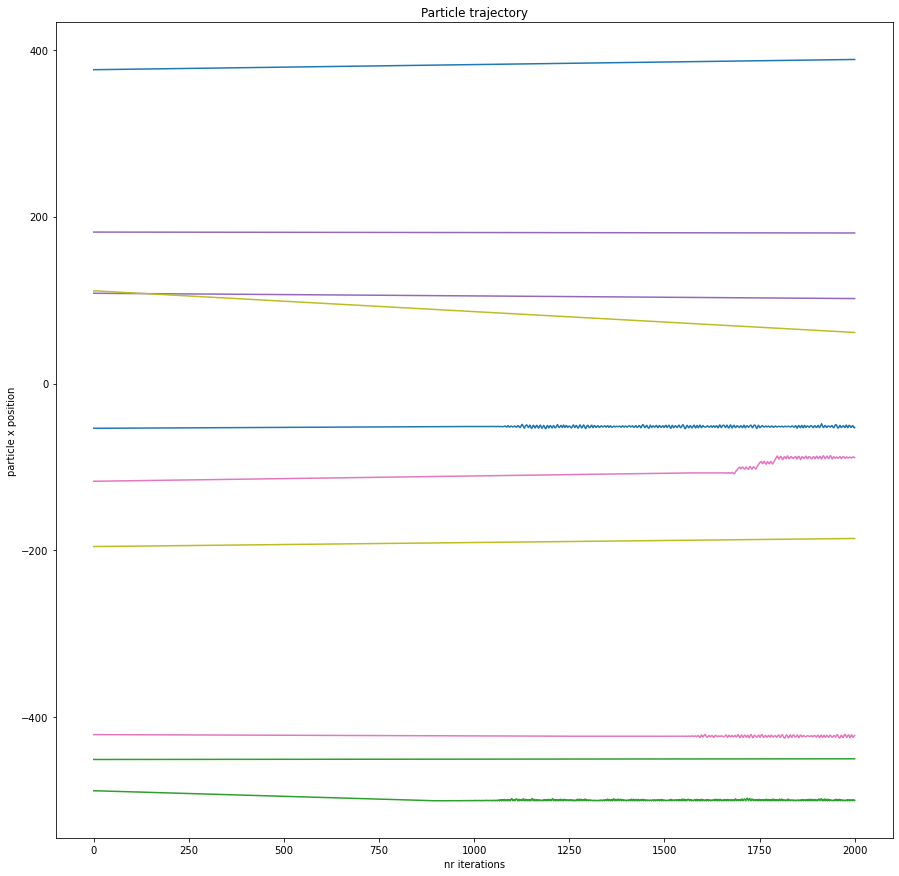

In [23]:
my_pso.plot_swarm_trajectory_graph()

### If we set $w = 0$

In [24]:
x_min = -500
x_max = 500
v_max = 1
c1 = 1
c2 = 1
N_particles = 10
w = 0
my_pso = PSO(objective_function = obj_f, x_min = x_min, x_max = x_max, v_max = v_max, c1 = c1, c2 = c2, 
             N_particles = N_particles, w = w)

98.26032263535376 -3.3167486345857444


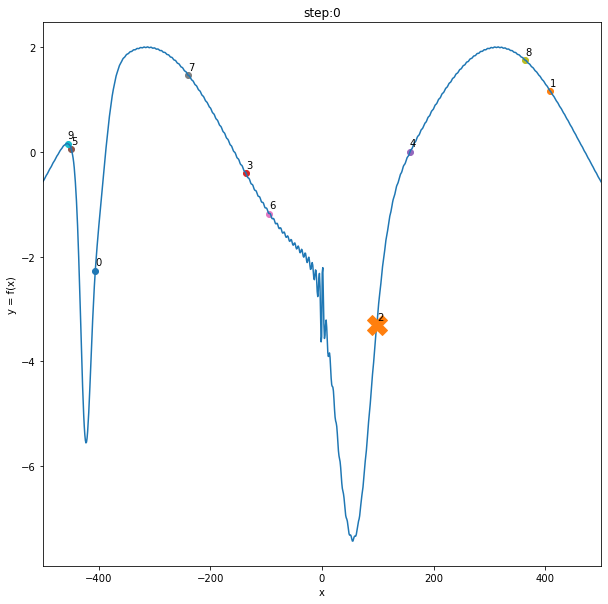

In [25]:
my_pso.visualize_swarm()

In [26]:
my_pso.run(2000)

New Global Best has been achieved
- x: [-431.28476323] f(x): [-3.66172488]
New Global Best has been achieved
- x: [94.26032264] f(x): [-3.79046451]
New Global Best has been achieved
- x: [-430.28476323] f(x): [-4.0248214]
New Global Best has been achieved
- x: [92.26032264] f(x): [-4.06490489]
New Global Best has been achieved
- x: [-429.28476323] f(x): [-4.36883887]
New Global Best has been achieved
- x: [89.26032264] f(x): [-4.41391717]
New Global Best has been achieved
- x: [-428.28476323] f(x): [-4.68092255]
New Global Best has been achieved
- x: [87.26032264] f(x): [-4.71268742]
New Global Best has been achieved
- x: [-427.28476323] f(x): [-4.95223352]
New Global Best has been achieved
- x: [85.26032264] f(x): [-4.97055271]
New Global Best has been achieved
- x: [-426.28476323] f(x): [-5.17834135]
New Global Best has been achieved
- x: [83.26032264] f(x): [-5.19752139]
New Global Best has been achieved
- x: [-425.28476323] f(x): [-5.35645095]
New Global Best has been achieved
- x:

(array([55.02350175]), array([-7.44087671]))

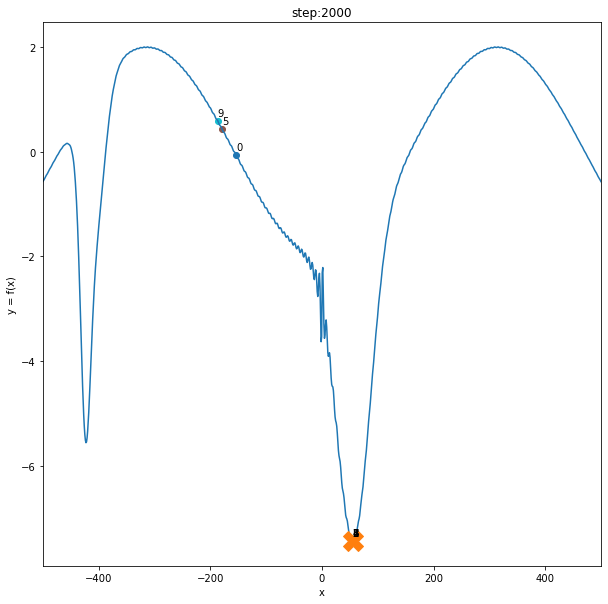

In [27]:
my_pso.visualize_swarm()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


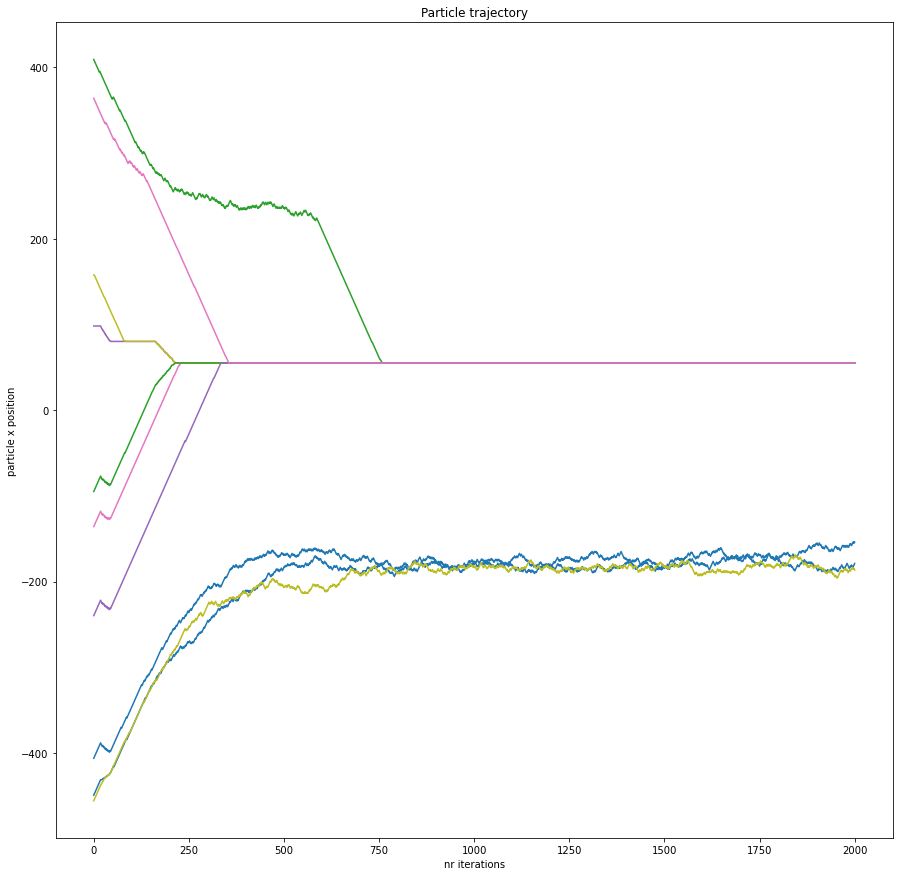

In [28]:
my_pso.plot_swarm_trajectory_graph()

### If we set $v_{max} = 200$

In [34]:
x_min = -500
x_max = 500
v_max = 200
c1 = 1
c2 = 1
N_particles = 10
w = 1
my_pso = PSO(objective_function = obj_f, x_min = x_min, x_max = x_max, v_max = v_max, c1 = c1, c2 = c2, 
             N_particles = N_particles, w = w)

-427.60843066681764 -4.869220364058


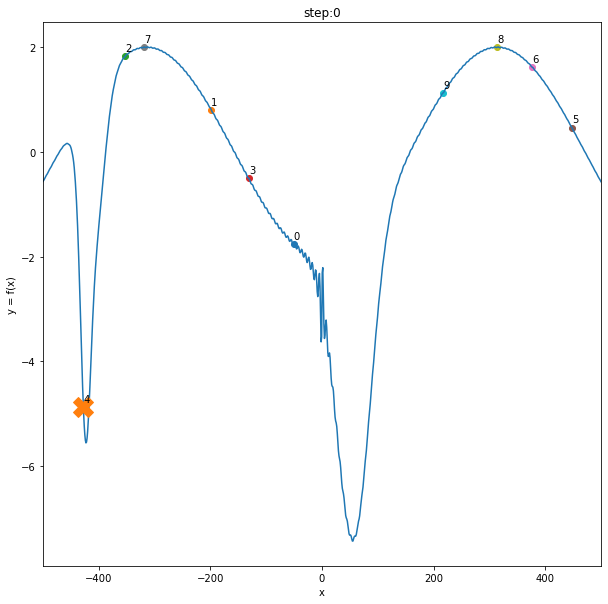

In [35]:
my_pso.visualize_swarm()

In [36]:
my_pso.run(2000)

New Global Best has been achieved
- x: [48.10687995] f(x): [-7.27114642]
New Global Best has been achieved
- x: [55.40665258] f(x): [-7.43783191]
New Global Best has been achieved
- x: [54.76232408] f(x): [-7.43944671]
New Global Best has been achieved
- x: [55.26639802] f(x): [-7.43963709]
New Global Best has been achieved
- x: [55.07185899] f(x): [-7.44082553]
New Global Best has been achieved
- x: [55.06854085] f(x): [-7.44083218]
New Global Best has been achieved
- x: [55.00231189] f(x): [-7.44086812]
New Global Best has been achieved
- x: [55.03153253] f(x): [-7.44087503]


(array([55.03153253]), array([-7.44087503]))

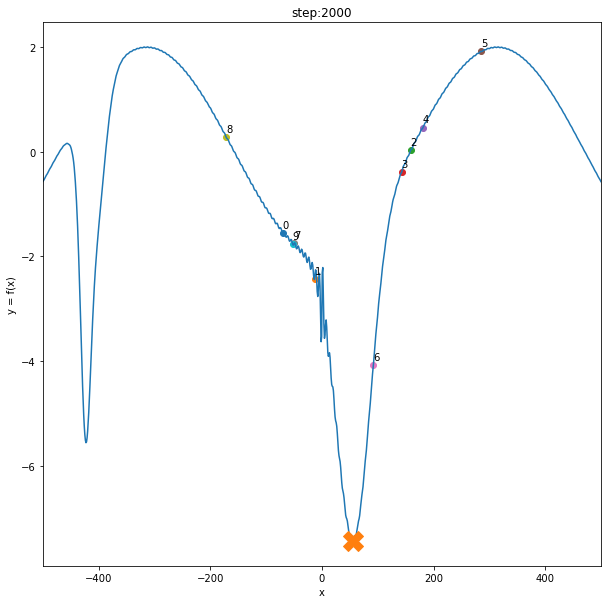

In [37]:
my_pso.visualize_swarm()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


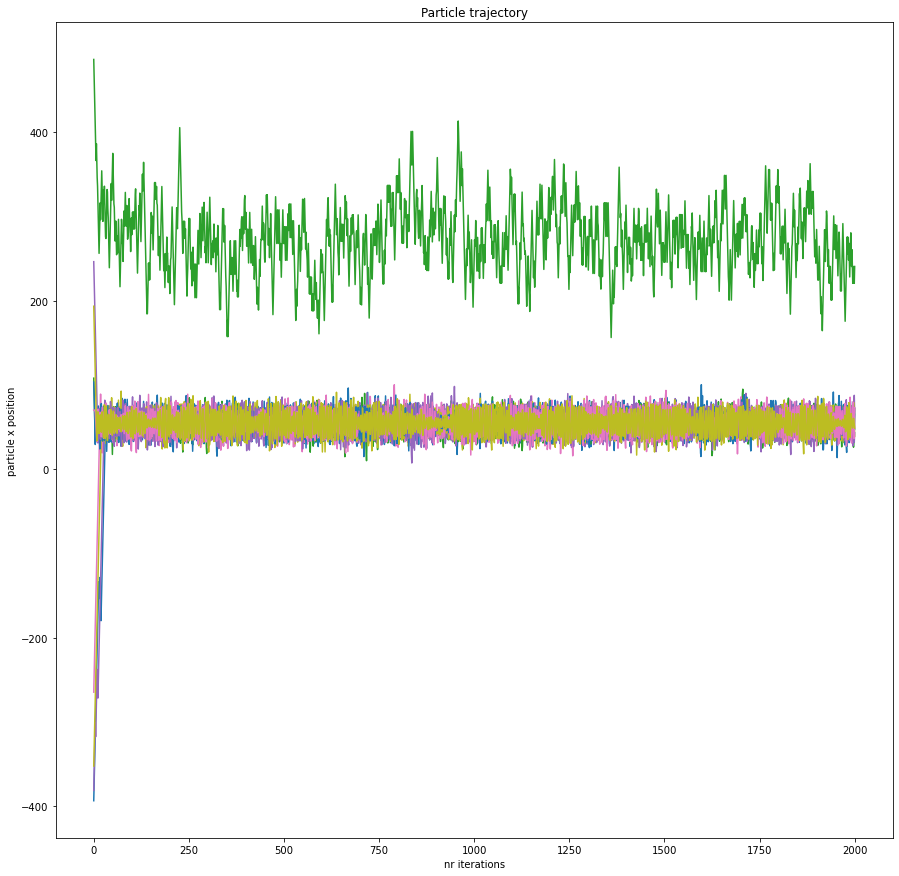

In [33]:
my_pso.plot_swarm_trajectory_graph()

### If we set $c_1 = 100$

In [38]:
x_min = -500
x_max = 500
v_max = 1
c1 = 100
c2 = 1
N_particles = 10
w = 1
my_pso = PSO(objective_function = obj_f, x_min = x_min, x_max = x_max, v_max = v_max, c1 = c1, c2 = c2, 
             N_particles = N_particles, w = w)

42.13128472132064 -6.914258474567403


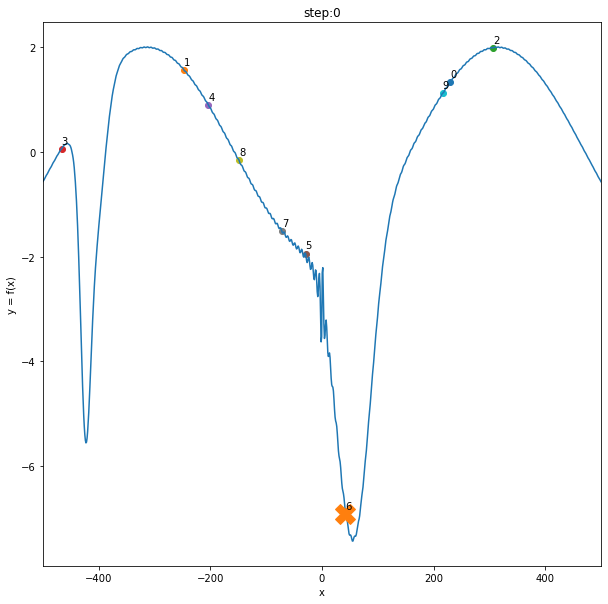

In [39]:
my_pso.visualize_swarm()

In [40]:
my_pso.run(2000)

New Global Best has been achieved
- x: [42.18103483] f(x): [-6.91857682]
New Global Best has been achieved
- x: [42.23706462] f(x): [-6.92329209]
New Global Best has been achieved
- x: [42.29309442] f(x): [-6.92784931]
New Global Best has been achieved
- x: [42.34912422] f(x): [-6.93224784]
New Global Best has been achieved
- x: [42.40515401] f(x): [-6.93648743]
New Global Best has been achieved
- x: [42.46118381] f(x): [-6.94056835]
New Global Best has been achieved
- x: [42.5172136] f(x): [-6.94449126]
New Global Best has been achieved
- x: [42.5732434] f(x): [-6.94825731]
New Global Best has been achieved
- x: [42.62927319] f(x): [-6.95186808]
New Global Best has been achieved
- x: [42.68530299] f(x): [-6.95532557]
New Global Best has been achieved
- x: [42.74133278] f(x): [-6.95863225]
New Global Best has been achieved
- x: [42.79736258] f(x): [-6.96179097]
New Global Best has been achieved
- x: [42.85339238] f(x): [-6.964805]
New Global Best has been achieved
- x: [42.90942217] f(

New Global Best has been achieved
- x: [59.98084642] f(x): [-7.34474506]
New Global Best has been achieved
- x: [60.0677131] f(x): [-7.34475658]
New Global Best has been achieved
- x: [60.02767788] f(x): [-7.34476841]
New Global Best has been achieved
- x: [60.03058531] f(x): [-7.34476856]
New Global Best has been achieved
- x: [52.47999706] f(x): [-7.34858193]
New Global Best has been achieved
- x: [53.47999706] f(x): [-7.39667469]
New Global Best has been achieved
- x: [54.47999706] f(x): [-7.43471103]
New Global Best has been achieved
- x: [55.47999706] f(x): [-7.43658552]
New Global Best has been achieved
- x: [55.18150563] f(x): [-7.44034743]
New Global Best has been achieved
- x: [55.08798274] f(x): [-7.44078665]
New Global Best has been achieved
- x: [54.99115114] f(x): [-7.44085597]
New Global Best has been achieved
- x: [55.04291863] f(x): [-7.44086798]
New Global Best has been achieved
- x: [55.02682006] f(x): [-7.44087635]
New Global Best has been achieved
- x: [55.02484411]

(array([55.02287888]), array([-7.44087673]))

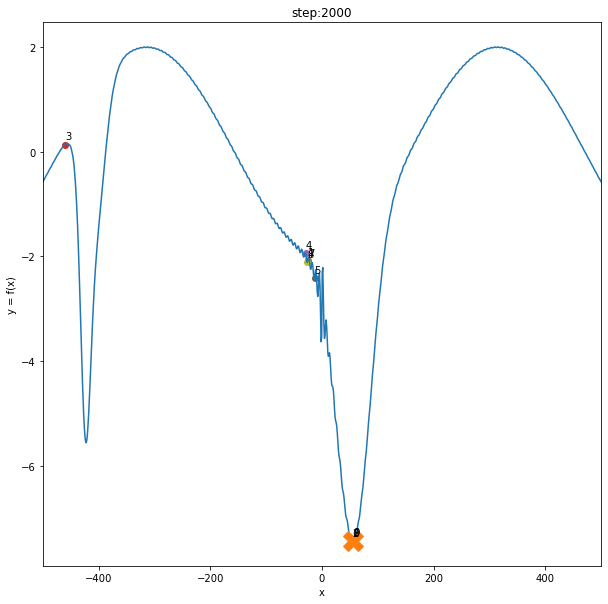

In [41]:
my_pso.visualize_swarm()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


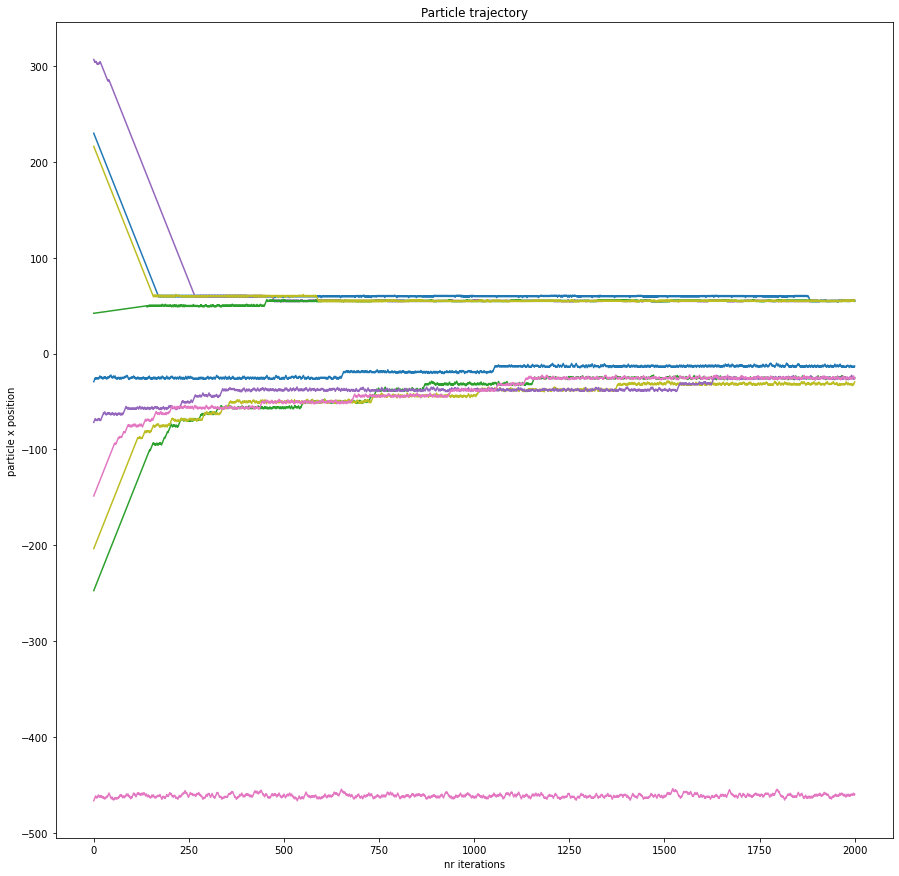

In [42]:
my_pso.plot_swarm_trajectory_graph()

### If we set $w = 100$

In [43]:
x_min = -500
x_max = 500
v_max = 1
c1 = 1
c2 = 1
N_particles = 10
w = 100
my_pso = PSO(objective_function = obj_f, x_min = x_min, x_max = x_max, v_max = v_max, c1 = c1, c2 = c2, 
             N_particles = N_particles, w = w)

112.66772180049043 -1.865373672810104


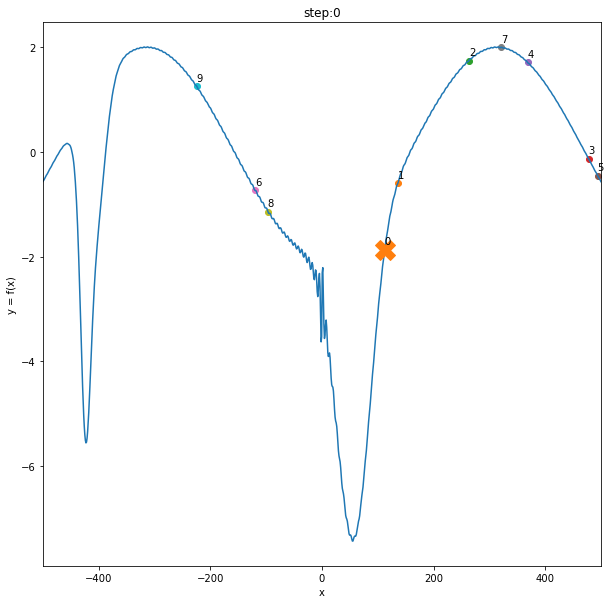

In [44]:
my_pso.visualize_swarm()

In [45]:
my_pso.run(2000)

New Global Best has been achieved
- x: [111.77669233] f(x): [-1.94815751]
New Global Best has been achieved
- x: [110.77669233] f(x): [-2.02850695]
New Global Best has been achieved
- x: [109.77669233] f(x): [-2.09939363]
New Global Best has been achieved
- x: [108.77669233] f(x): [-2.1757378]
New Global Best has been achieved
- x: [107.77669233] f(x): [-2.27023097]
New Global Best has been achieved
- x: [106.77669233] f(x): [-2.38152832]
New Global Best has been achieved
- x: [105.77669233] f(x): [-2.49523154]
New Global Best has been achieved
- x: [104.77669233] f(x): [-2.59698629]
New Global Best has been achieved
- x: [103.77669233] f(x): [-2.68577417]
New Global Best has been achieved
- x: [102.77669233] f(x): [-2.77507599]
New Global Best has been achieved
- x: [101.77669233] f(x): [-2.88059689]
New Global Best has been achieved
- x: [100.77669233] f(x): [-3.00568048]
New Global Best has been achieved
- x: [99.77669233] f(x): [-3.13789634]
New Global Best has been achieved
- x: [

(array([55.01944471]), array([-7.44087653]))

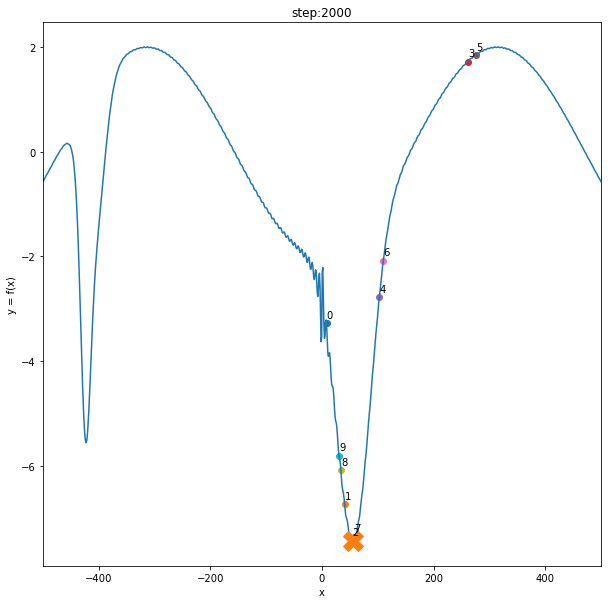

In [46]:
my_pso.visualize_swarm()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


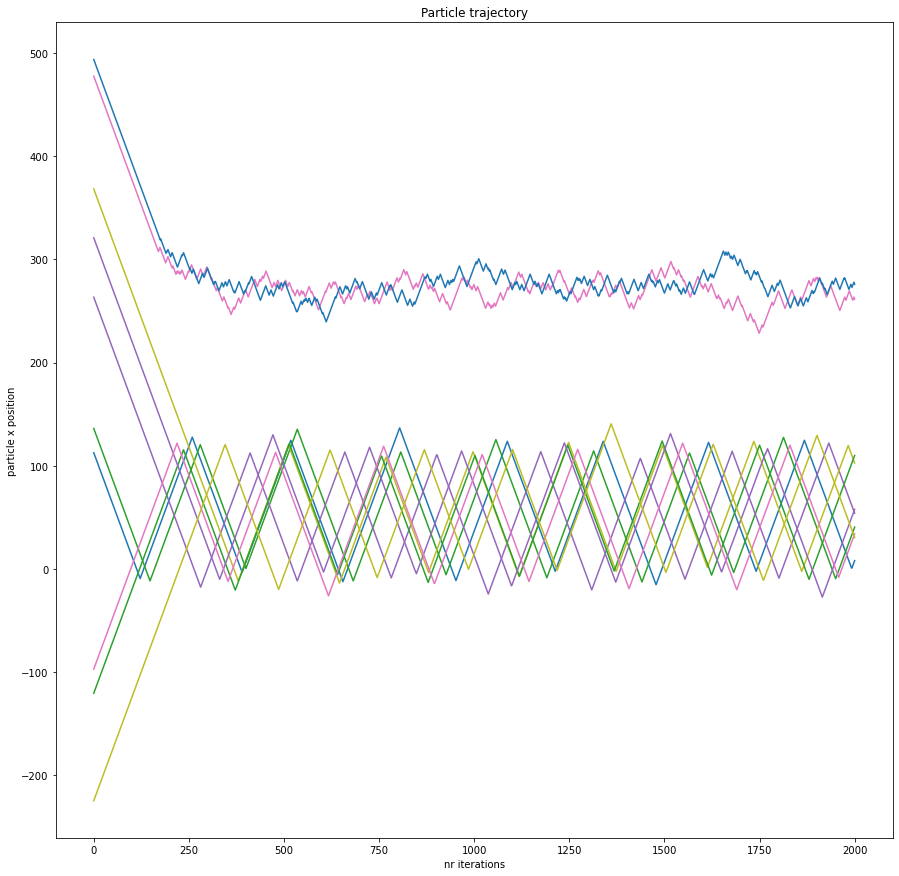

In [47]:
my_pso.plot_swarm_trajectory_graph()

### If we set $c_2 = 100$

In [48]:
x_min = -500
x_max = 500
v_max = 1
c1 = 1
c2 = 100
N_particles = 10
w = 1
my_pso = PSO(objective_function = obj_f, x_min = x_min, x_max = x_max, v_max = v_max, c1 = c1, c2 = c2, 
             N_particles = N_particles, w = w)

80.78398342399589 -5.556523382602804


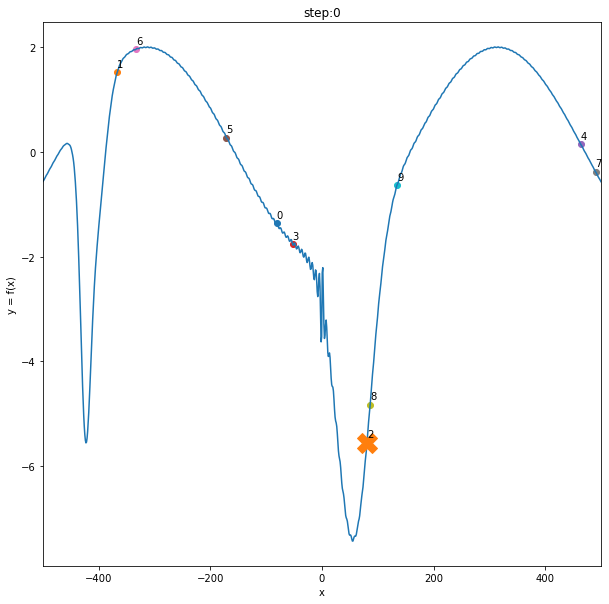

In [49]:
my_pso.visualize_swarm()

In [50]:
my_pso.run(2000)

New Global Best has been achieved
- x: [80.7272242] f(x): [-5.56450301]
New Global Best has been achieved
- x: [80.6643278] f(x): [-5.57326457]
New Global Best has been achieved
- x: [80.6014314] f(x): [-5.58193761]
New Global Best has been achieved
- x: [80.538535] f(x): [-5.59051883]
New Global Best has been achieved
- x: [80.43982635] f(x): [-5.60379391]
New Global Best has been achieved
- x: [79.43982635] f(x): [-5.72405691]
New Global Best has been achieved
- x: [78.43982635] f(x): [-5.8238549]
New Global Best has been achieved
- x: [77.43982635] f(x): [-5.92289481]
New Global Best has been achieved
- x: [76.43982635] f(x): [-6.03973867]
New Global Best has been achieved
- x: [75.43982635] f(x): [-6.17422749]
New Global Best has been achieved
- x: [74.43982635] f(x): [-6.30686896]
New Global Best has been achieved
- x: [73.43982635] f(x): [-6.41619957]
New Global Best has been achieved
- x: [72.43982635] f(x): [-6.49844543]
New Global Best has been achieved
- x: [71.43982635] f(x)

(array([55.02265853]), array([-7.44087673]))

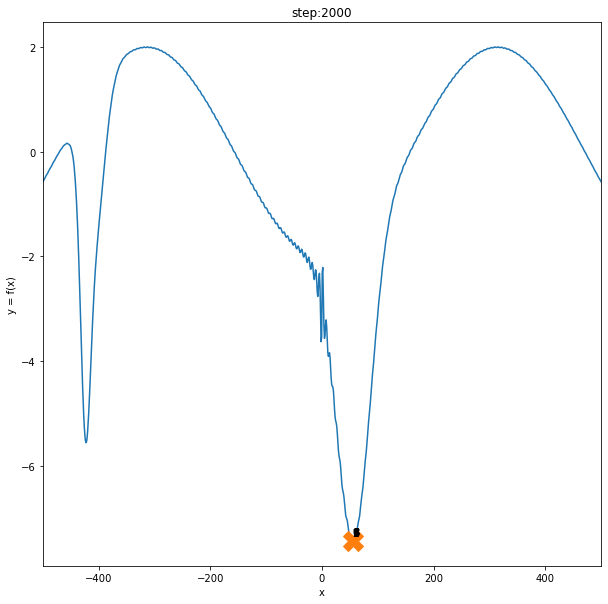

In [51]:
my_pso.visualize_swarm()

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


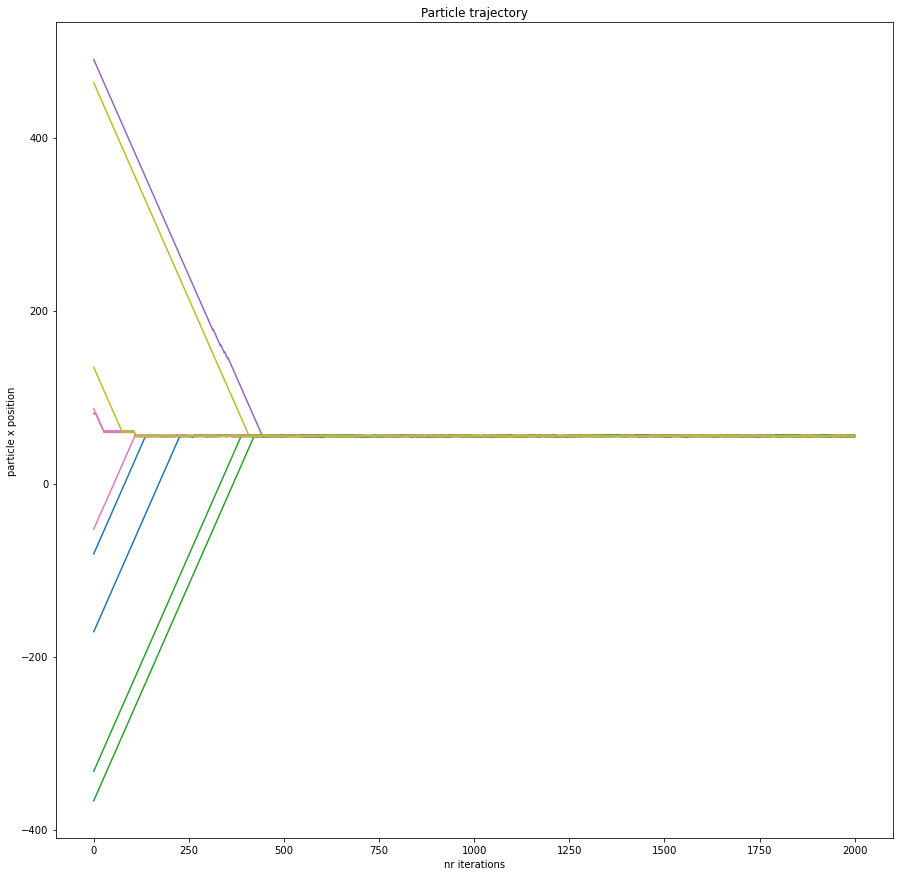

In [52]:
my_pso.plot_swarm_trajectory_graph()